# Testing (and demonstrating) `plot_images()`

In [1]:
%matplotlib inline
import numpy as np
import hyperspy.api as hs
import matplotlib.pyplot as plt

`plot_images()` is used to plot several images in the same figure. It supports many configurations and has many options available to customize the resulting output. The function returns a list of `matplotlib` axes, which can be used to further customize the figure. Some examples are given below.

## Default usage

A common usage for `plot_images()` is to view the different slices of a multidimensional image (a *hyperimage*):

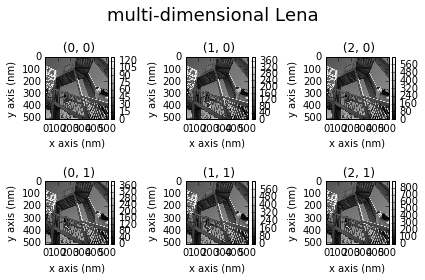

In [2]:
import scipy.ndimage
image = hs.signals.Signal2D(np.random.random((2, 3, 512, 512)))
for i in range(2):
    for j in range(3):
        image.data[i,j,:] = scipy.misc.ascent()*(i+0.5+j)
        
axes = image.axes_manager
axes[2].name = "x"
axes[3].name = "y"
axes[2].units = "nm"
axes[3].units = "nm"
    
image.metadata.General.title = 'multi-dimensional Lena'
hs.plot.plot_images(image, tight_layout=True)

## Specified labels

By default, `plot_images()` will attempt to auto-label the images based on the `Signal` titles. The labels (and title) can be customized with the `label` and `suptitle` arguments. In this example, the axes labels and ticks are also disabled with `axes_decor`:

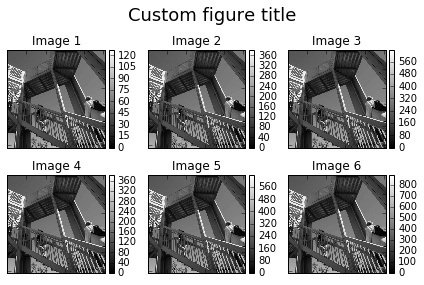

In [3]:
import scipy.ndimage
image = hs.signals.Signal2D(np.random.random((2, 3, 512, 512)))
for i in range(2):
    for j in range(3):
        image.data[i,j,:] = scipy.misc.ascent()*(i+0.5+j)
        
axes = image.axes_manager
axes[2].name = "x"
axes[3].name = "y"
axes[2].units = "nm"
axes[3].units = "nm"
    
image.metadata.General.title = 'multi-dimensional Lena'
hs.plot.plot_images(image, suptitle='Custom figure title', 
                       label=['Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5', 'Image 6'],
                       axes_decor=None, tight_layout=True)

## List of images

`plot_images()` can also be used to easily plot a list of `Images`, comparing different `Signals`, including RGB images. This example also demonstrates how to wrap labels using `labelwrap` (for preventing overlap) and using a single `colorbar` for all the `Images`, as opposed to multiple individual ones:

/home/to266/dev/hyperspy/hyperspy/signals.py:83: VisibleDeprecationWarning: The Image class will be deprecated from version 1.0.0 and replaced with Signal2D
  VisibleDeprecationWarning)


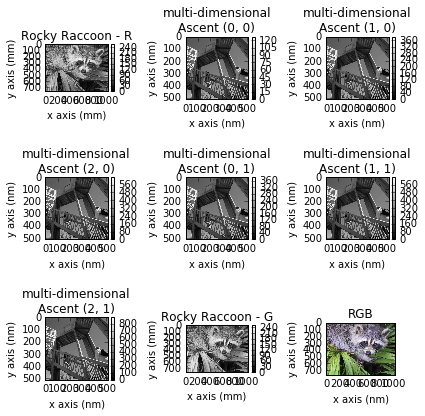

In [4]:
import scipy.ndimage

# load red channel of raccoon as an image
image0 = hs.signals.Signal2D(scipy.misc.ascent()[:,:,0])
image0.metadata.General.title = 'Rocky Raccoon - R'
axes0 = image0.axes_manager
axes0[0].name = "x"
axes0[1].name = "y"
axes0[0].units = "mm"
axes0[1].units = "mm"

# load lena into 2x3 hyperimage
image1 = hs.signals.Signal2D(np.random.random((2, 3, 512, 512)))
image1.metadata.General.title = 'multi-dimensional Ascent'
for i in range(2):
    for j in range(3):
        image1.data[i,j,:] = scipy.misc.ascent()*(i+0.5+j)
axes1 = image1.axes_manager
axes1[2].name = "x"
axes1[3].name = "y"
axes1[2].units = "nm"
axes1[3].units = "nm"

# load green channel of raccoon as an image
image2 = hs.signals.Signal2D(scipy.misc.ascent()[:,:,1])
image2.metadata.General.title = 'Rocky Raccoon - G'
axes2 = image2.axes_manager
axes2[0].name = "x"
axes2[1].name = "y"
axes2[0].units = "mm"
axes2[1].units = "mm"

# load rgb image
rgb = hs.signals.Signal1D(scipy.misc.ascent())
rgb.change_dtype("rgb8")
rgb.metadata.General.title = 'RGB'
axesRGB = rgb.axes_manager
axesRGB[0].name = "x"
axesRGB[1].name = "y"
axesRGB[0].units = "nm"
axesRGB[1].units = "nm"


hs.plot.plot_images([image0, image1, image2, rgb], tight_layout=True,
                       #colorbar='single', 
                       labelwrap=20)

## Real-world use

Another example for this function is plotting EDS line intensities. Using a spectrum image with EDS data, one can use the following commands to get a representative figure of the line intensities. This example also demonstrates changing the colormap (with `cmap`), adding scalebars to the plots (with `scalebar`), and changing the padding between the images. The `padding` is specified as a dictionary, which is used to call `matplotlib.figure.Figure.subplots_adjust()` (see [documentation](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.subplots_adjust)).
Note, this padding can also be changed interactively by clicking on the `subplots_adjust` button (<img src="plot_images_subplots.png" style="display:inline-block;vertical-align:bottom">) in the GUI (button may be different when using different graphical backends).

The sample and the data used are described in 
P. Burdet, et al., Acta Materialia, 61, p. 3090-3098 (2013) (see http://infoscience.epfl.ch/record/185861/).

Further information is available in the Hyperspy EDS tutorial: 

 * http://nbviewer.ipython.org/github/hyperspy/hyperspy-demos/blob/master/electron_microscopy/EDS/Hyperpsy_EDS_TEM_tutorial_CAM_2015.ipynb

In [5]:
from urllib.request import urlretrieve
url = 'http://cook.msm.cam.ac.uk//~hyperspy//EDS_tutorial//'
urlretrieve(url + 'core_shell.hdf5', 'core_shell.hdf5')

('core_shell.hdf5', <http.client.HTTPMessage at 0x7fdb74da6710>)

/home/to266/dev/hyperspy/hyperspy/signals.py:54: VisibleDeprecationWarning: The Spectrum class will be deprecated from version 1.0.0 and replaced with Signal1D
  VisibleDeprecationWarning)
/home/to266/dev/hyperspy/hyperspy/signals.py:126: VisibleDeprecationWarning: The Signal class will be deprecated from version 1.0.0 and replaced with BaseSignal
  VisibleDeprecationWarning)
/home/to266/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


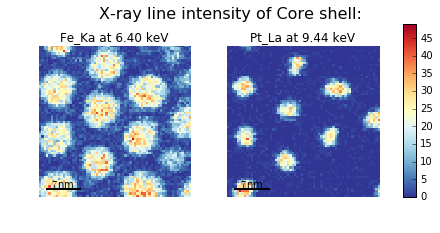

In [6]:
si_EDS = hs.load("core_shell.hdf5")
im = si_EDS.get_lines_intensity()
hs.plot.plot_images(
    im, tight_layout=True, cmap='RdYlBu_r', axes_decor='off',
    colorbar='single', scalebar='all', 
    scalebar_color='black', suptitle_fontsize=16,
    padding={'top':0.8, 'bottom':0.10, 'left':0.05,
             'right':0.85, 'wspace':0.20, 'hspace':0.10})    

In [7]:
# cleanup
!rm  core_shell.hdf5